# Import some libraries

In [1]:
# for dataset handeling and calculations
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline 

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Read datasets

In [3]:
c_d_country=pd.read_csv('../data/covid19_date_country.csv')
c_country_l=pd.read_csv('../data/covid19_country_latest.csv')
c_world=pd.read_csv('../data/covid19_world.csv')

In [4]:
c_d_country.head() 

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,WHO region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,EMRO
1,2020-01-22,Albania,0,0,0,0,0,0,0,EURO
2,2020-01-22,Algeria,0,0,0,0,0,0,0,AFRO
3,2020-01-22,Andorra,0,0,0,0,0,0,0,EURO
4,2020-01-22,Angola,0,0,0,0,0,0,0,AFRO


In [5]:
c_country_l.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
0,Afghanistan,35615,1186,23741,10688,89,1,0,66.66,3.33,EMRO
1,Albania,4290,117,2397,1776,119,4,45,55.87,2.73,EURO
2,Algeria,24278,1100,16646,6532,587,13,246,68.56,4.53,AFRO
3,Andorra,884,52,803,29,0,0,0,90.84,5.88,EURO
4,Angola,779,30,221,528,30,1,0,28.37,3.85,AFRO


In [6]:
c_world.head()

,Date,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
0,2020-01-22,555,17,28,510,0,0,0,5.05,3.06,6
1,2020-01-23,654,18,30,606,99,1,2,4.59,2.75,8
2,2020-01-24,941,26,36,879,287,8,6,3.83,2.76,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.72,2.93,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.46,2.64,13


In [7]:
# convert dates to proper date formats

c_d_country['Date'] = pd.to_datetime(c_d_country['Date'])

c_world['Date'] = pd.to_datetime(c_world['Date'])

# Using time series for Data modeling and prediction  

## total confirmed cases of the world - Prediction

In [8]:
# finding numbers related to dates
num_dates = c_world.index.values.reshape(-1, 1)

# number of days in future considered to forecasting
future_days = 10

# find numbers related to days from start to future
num_start_to_futures = np.array([i for i in range(c_world.shape[0]+future_days)]).reshape(-1, 1)

# first date in the dataset
f_date = c_world['Date'].tolist()[0]

# find dates related to days from start to future for better visualization
dates_start_to_futures = pd.Series([(f_date + timedelta(days=i)) for i in range(len(num_start_to_futures))])
print(dates_start_to_futures.shape)

(192,)


In [9]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(num_dates[50:],
                                                                                c_world['Confirmed'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(105, 1)
(105,)
(27, 1)
(27,)


### Support vector machine regressor

RMSE of  SVR 84855.25
MAE of  SVR 76772.28 



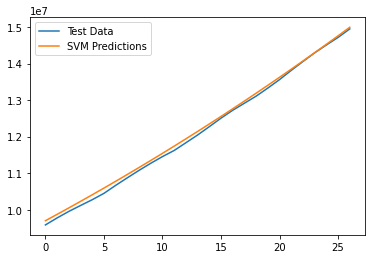

In [10]:
svm_reg = SVR(C=0.1,kernel='poly',gamma=0.01, epsilon=1)
svm_reg.fit(X_train_confirmed, y_train_confirmed)

svm_pred = svm_reg.predict(num_start_to_futures[50:].reshape(-1,1))

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

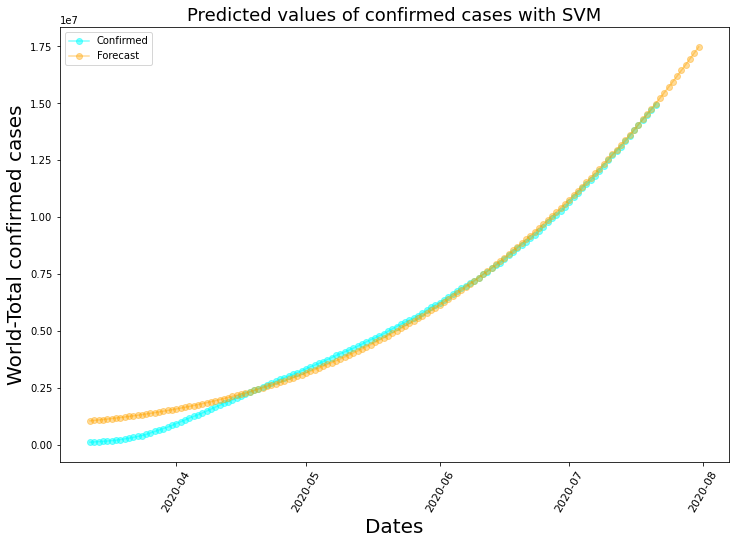

In [11]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with SVM" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Linear regression

coef:  [ 7.66225104e+06 -4.13336811e+05  7.37227442e+03 -4.92032568e+01
  1.25055350e-01]
RMSE of  LinearRegression 880383.64
MAE of  LinearRegression 700913.29 



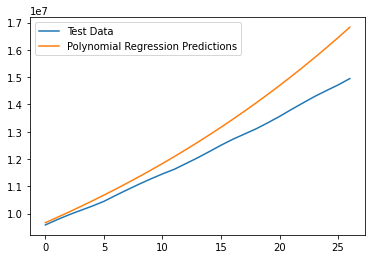

In [12]:
# transform the training data

poly_features=PolynomialFeatures(degree=4)

poly_X_train_confirmed = poly_features.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly_features.fit_transform(X_test_confirmed)
poly_future_forecast = poly_features.fit_transform(num_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_confirmed,y_train_confirmed)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_confirmed)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

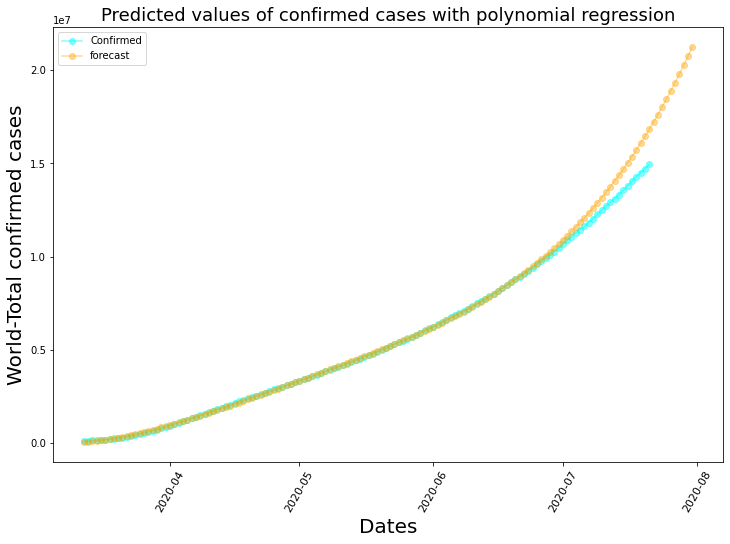

In [13]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with polynomial regression" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Random Forests Regressor

RMSE of  RandomForestRegressor 3254934.58
MAE of  RandomForestRegressor 2825871.56 



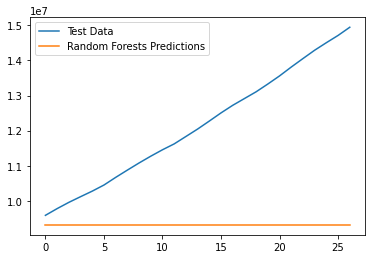

In [14]:
rf_reg = RandomForestRegressor(max_depth=7,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

rf_pred = rf_reg.predict(num_start_to_futures[50:].reshape(-1,1))

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

In [15]:
y_pred

array([9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104])

In [16]:
y_test_confirmed

array([ 9586161,  9777507,  9955617, 10117247, 10275819, 10449717,
       10667406, 10875111, 11078605, 11272172, 11454867, 11622210,
       11833054, 12044856, 12273083, 12505660, 12721988, 12914656,
       13107435, 13328887, 13560006, 13812547, 14054586, 14292221,
       14506868, 14713646, 14947101], dtype=int64)

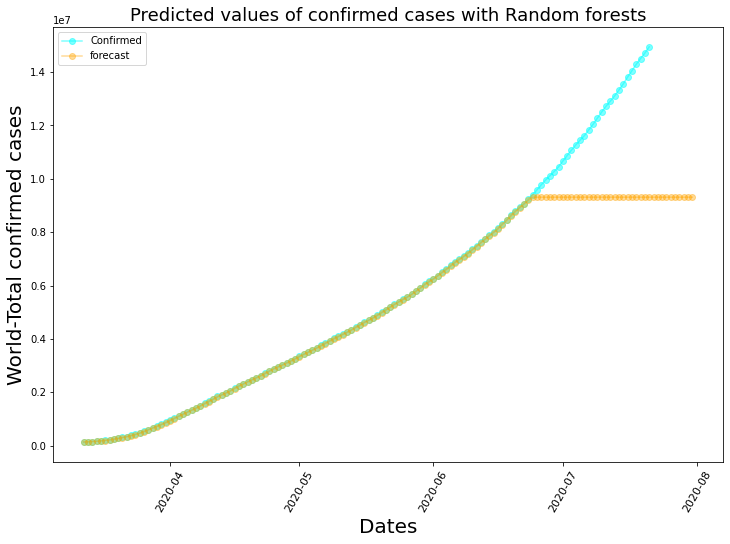

In [17]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with Random forests" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= rf_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### XGBoost Regressor

In [18]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSE of  XGBRegressor 3172578.3
MAE of  XGBRegressor 2730605.07 



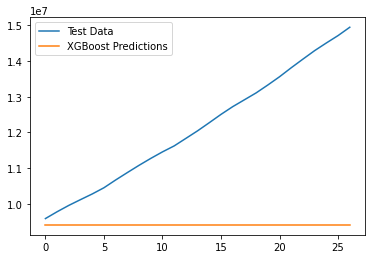

In [19]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

xgb_pred = xgb_reg.predict(num_start_to_futures[50:])

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

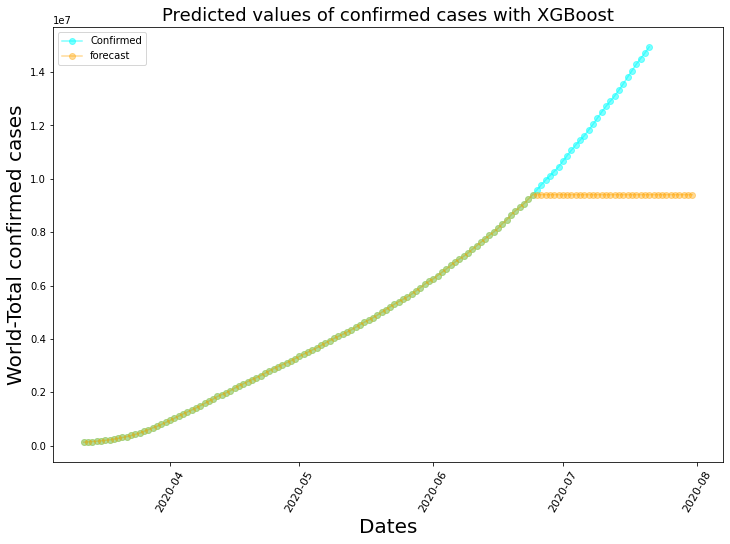

In [20]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with XGBoost" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= xgb_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Prophet Model for prediction

In [21]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


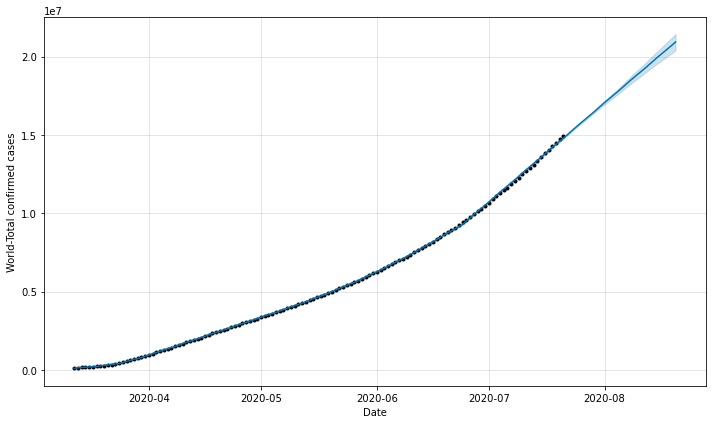

In [22]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = c_world['Date'][50:]
data['y'] = c_world['Confirmed'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total confirmed cases')

## Prediction of total death cases of the world

In [23]:
#Splitting the dataset related to death cases of the world into training and test sets

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(num_dates[50:],
                                                                                c_world['Deaths'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_death.shape)
print(y_train_death.shape)
print(X_test_death.shape)
print(y_test_death.shape)

(105, 1)
(105,)
(27, 1)
(27,)


### Support vector machine regressor

RMSE of  SVR 140122.16
MAE of  SVR 132050.46 



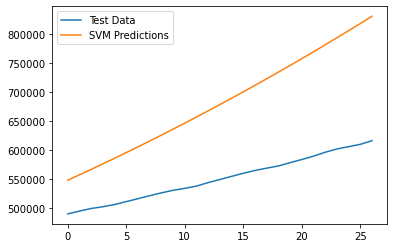

In [24]:
svm_reg = SVR(C=0.01,kernel='poly',gamma=0.01)
svm_reg.fit(X_train_death, y_train_death)

svm_pred = svm_reg.predict(num_start_to_futures[50:])

y_pred = svm_reg.predict(X_test_death)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

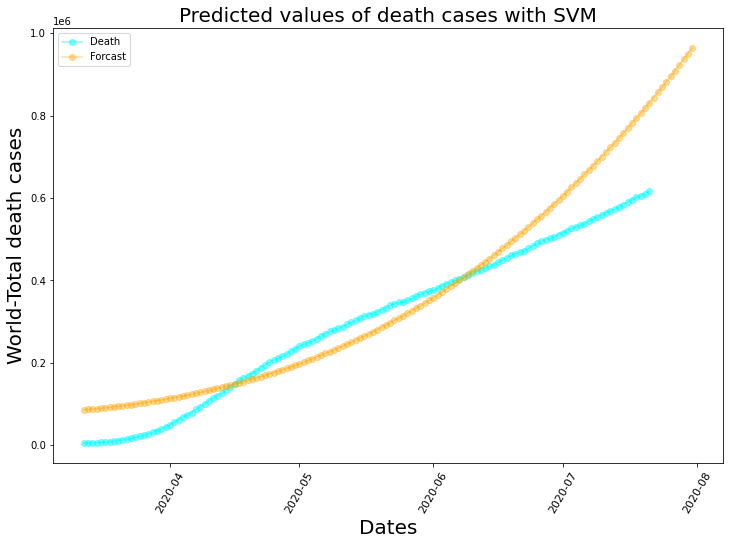

In [25]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with SVM" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forcast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Linear regression

coef:  [ 2.33487678e+06 -1.21007632e+05  2.29232403e+03 -1.97679116e+01
  8.13529626e-02 -1.28597458e-04]
RMSE of  LinearRegression 19337.13
MAE of  LinearRegression 16979.96 



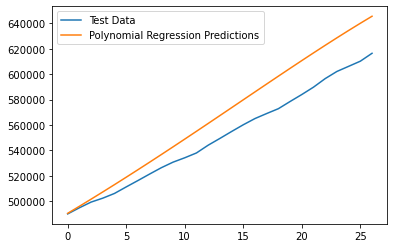

In [26]:
# transform the training data

poly_features=PolynomialFeatures(degree=5)

poly_X_train_death = poly_features.fit_transform(X_train_death)
poly_X_test_death = poly_features.fit_transform(X_test_death)
poly_future_forecast = poly_features.fit_transform(num_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_death,y_train_death)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_death)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

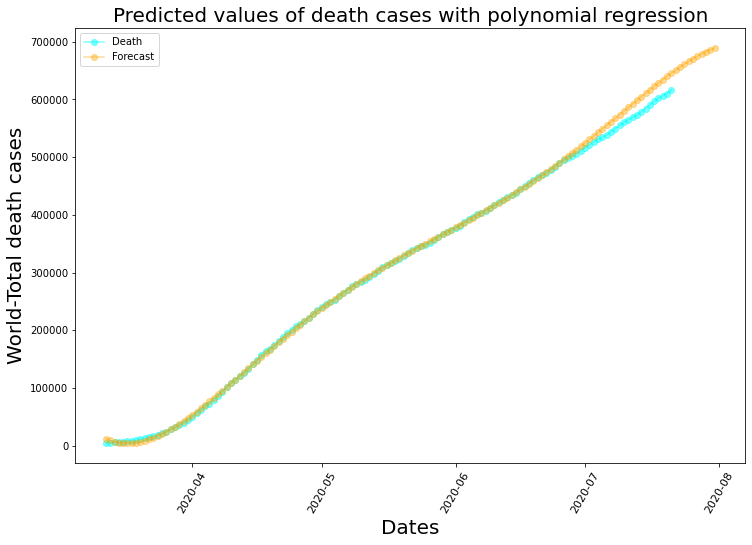

In [27]:
dates = dates_start_to_futures[50:-10]

world_df=c_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with polynomial regression" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Prophet Model for prediction

In [28]:
import warnings

warnings.filterwarnings("ignore")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


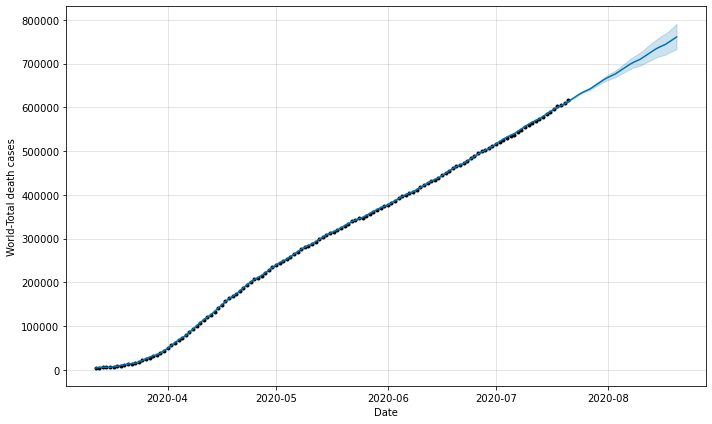

In [29]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = c_world['Date'][50:]
data['y'] = c_world['Deaths'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total death cases')

## Prediction of confirmed cases of 5 most affected countries and Iran using ARIMA and Prophet

### Prophet Model for prediction

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

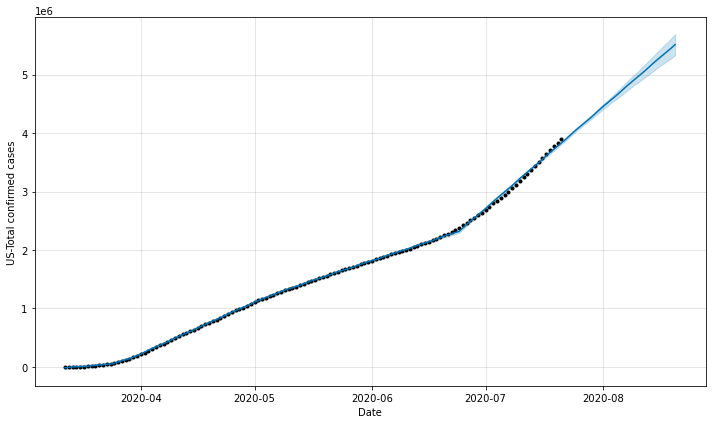

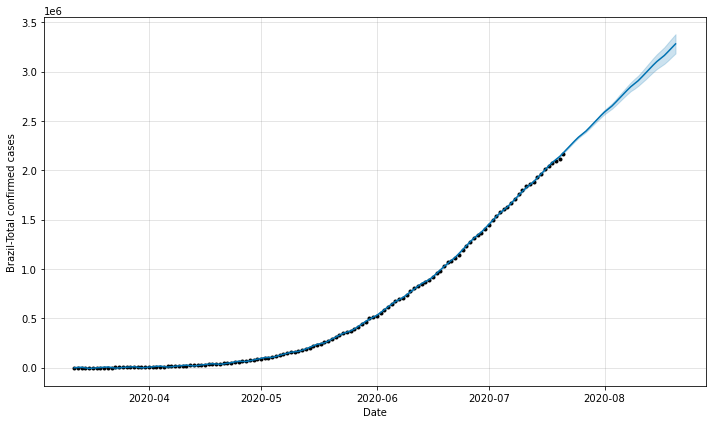

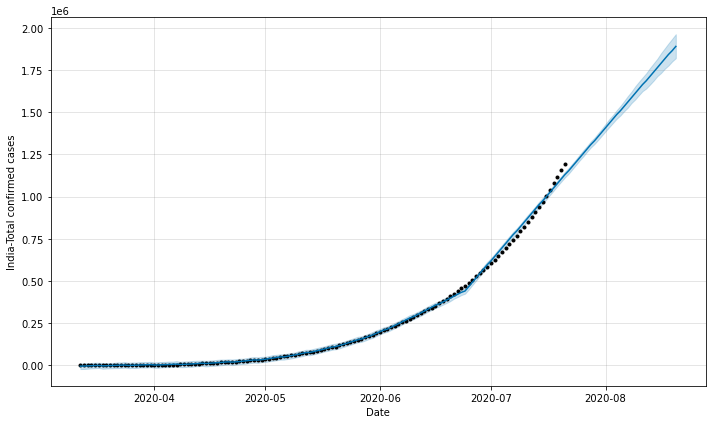

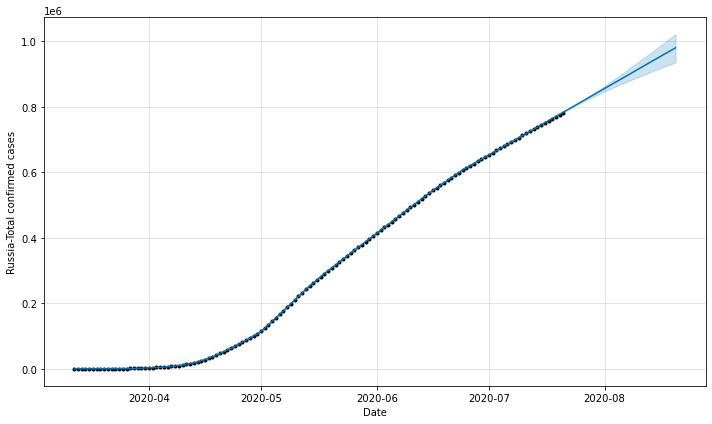

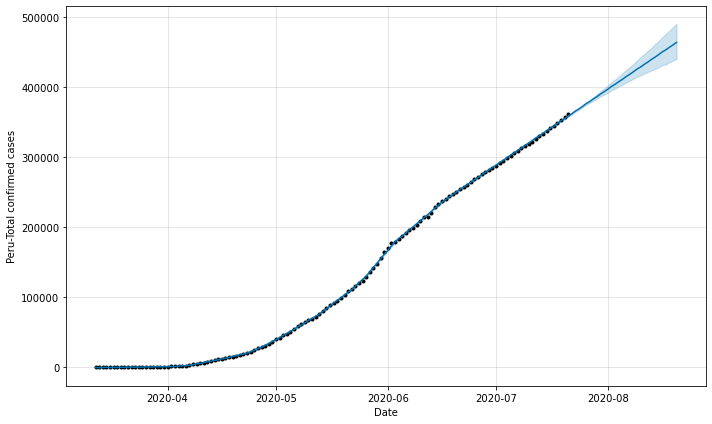

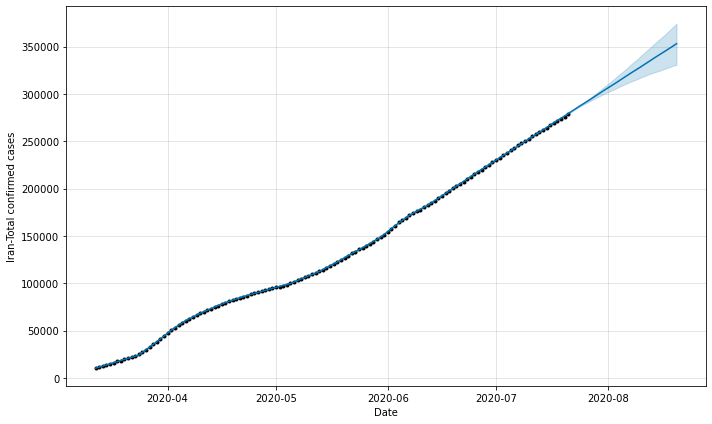

In [30]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=c_d_country[c_d_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = c_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total confirmed cases' %(j))
    k=k+1

## Deaths prediction of 5 most affected countries using Prophet

### Prophet Model for prediction

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

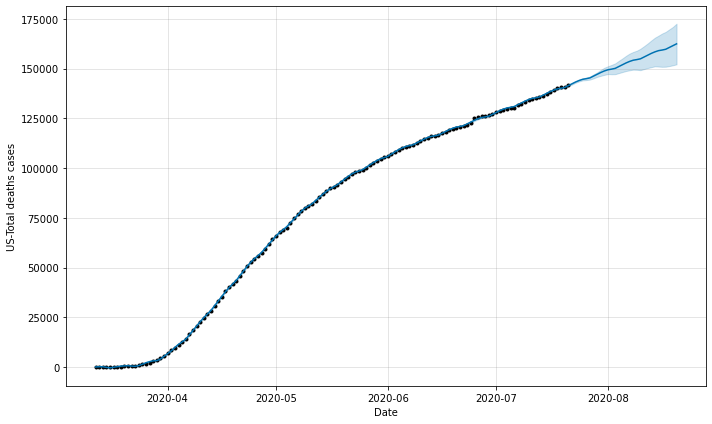

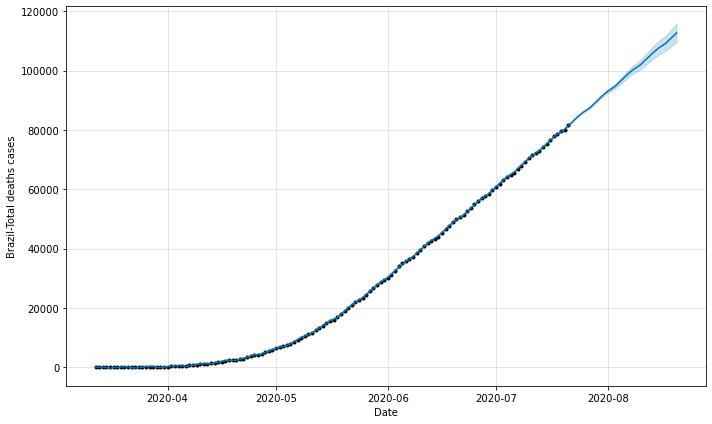

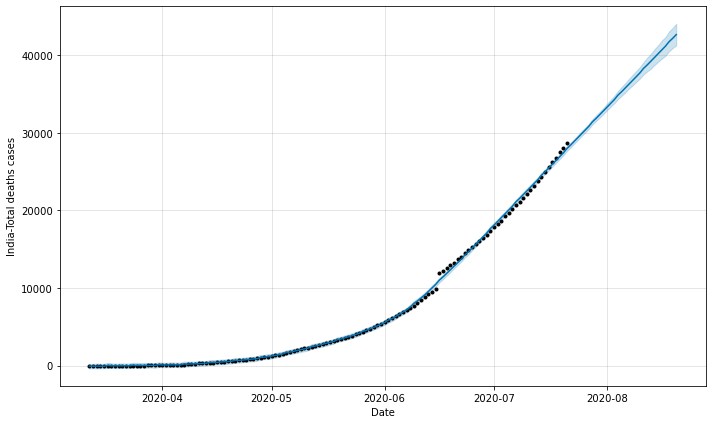

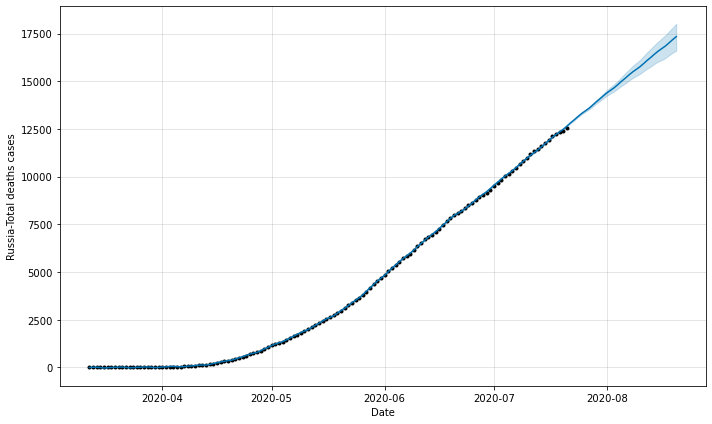

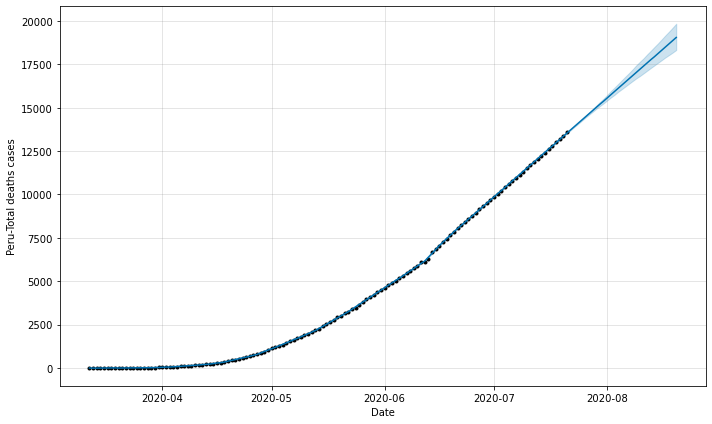

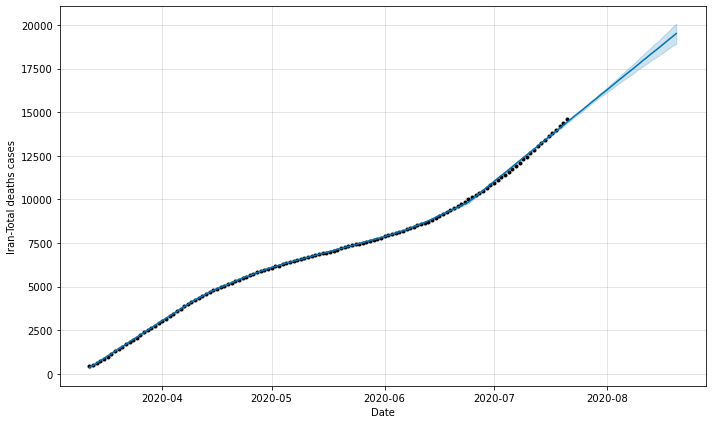

In [31]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=c_d_country[c_d_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = c_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total deaths cases' %(j))
    k=k+1

In [32]:
iran_df=pd.read_csv('../data/covid19_iran.csv')

In [33]:
iran_df1=iran_df[['Date','Confirmed']].copy().loc[:]
iran_df1.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [34]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(iran_df1)-n_steps

conf=iran_df1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

### Multilayer Perceptron (MLP)

In [35]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

Samples: 162
[[[0.89238271]
  [0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]]] => [[0.99060431]]
[[[0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]
  [0.99060431]]] => [[1.]]


In [37]:
# estimation: input_neurons=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [38]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 200)           400       
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [40]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [41]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 3s 64ms/step - loss: 0.0325 - val_loss: 0.2710
Epoch 2/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0297 - val_loss: 0.0137
Epoch 3/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0204
Epoch 4/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 7.6393e-04
Epoch 6/200
10/10 [==============================] - 0s 18ms/step - loss: 9.7655e-04 - val_loss: 0.0060
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 4.2552e-04 - val_loss: 9.2364e-04
Epoch 8/200
10/10 [==============================] - 0s 11ms/step - loss: 2.8593e-04 - val_loss: 4.6521e-04
Epoch 9/200
10/10 [==============================] - 0s 15ms/step - loss: 3.9075e-04 - val_loss: 8.5601e-04
Epoch 10/200
10/10 [==============================] - 0s 13ms/step -

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

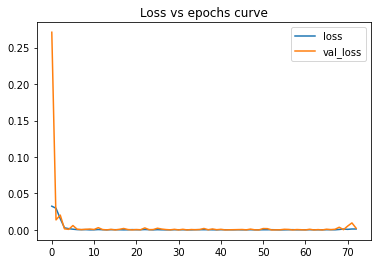

In [43]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [44]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

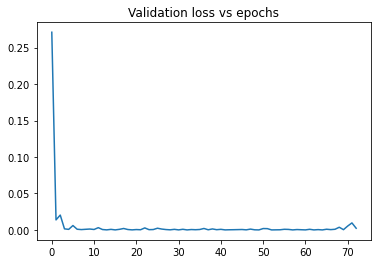

In [45]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

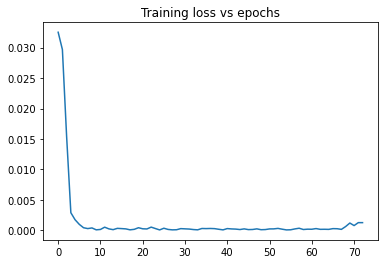

In [46]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [47]:
# list of predictions
test_prediction = []

# last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [48]:
# forecast the number of confirmed cases in Iran for the validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0052966], dtype=float32),
 array([1.0148264], dtype=float32),
 array([1.0241061], dtype=float32),
 array([1.033378], dtype=float32),
 array([1.0425075], dtype=float32),
 array([1.051778], dtype=float32),
 array([1.0609193], dtype=float32),
 array([1.0698658], dtype=float32),
 array([1.0792053], dtype=float32),
 array([1.088539], dtype=float32),
 array([1.0974803], dtype=float32),
 array([1.1069769], dtype=float32),
 array([1.1164571], dtype=float32),
 array([1.1259656], dtype=float32),
 array([1.1355017], dtype=float32),
 array([1.1451192], dtype=float32),
 array([1.154741], dtype=float32)]

In [49]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([256468.24962652, 258899.47101796, 261266.88736975, 263632.29650867,
       265961.3933419 , 268326.43753302, 270658.54518557, 272940.95911324,
       275323.61203551, 277704.8051666 , 279985.88095236, 282408.61730754,
       284827.18717539, 287252.96476221, 289685.79800642, 292139.37245035,
       294594.07214999])

### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [50]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [51]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                                 
 dense_3 (Dense)             (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [52]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [53]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [54]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 6s 83ms/step - loss: 0.1546 - val_loss: 0.5399
Epoch 2/200
10/10 [==============================] - 0s 31ms/step - loss: 0.0640 - val_loss: 0.0382
Epoch 3/200
10/10 [==============================] - 0s 29ms/step - loss: 0.0319 - val_loss: 0.0500
Epoch 4/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0159 - val_loss: 0.0757
Epoch 5/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0078 - val_loss: 0.0302
Epoch 6/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 7/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 5.8528e-05
Epoch 8/200
10/10 [==============================] - 0s 20ms/step - loss: 4.4913e-04 - val_loss: 0.0059
Epoch 9/200
10/10 [==============================] - 0s 21ms/step - loss: 2.4337e-04 - val_loss: 2.2891e-04
Epoch 10/200
10/10 [==============================] - 0s 19ms/step - loss: 3.2331e-0

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

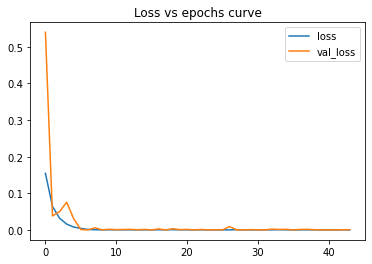

In [55]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [56]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

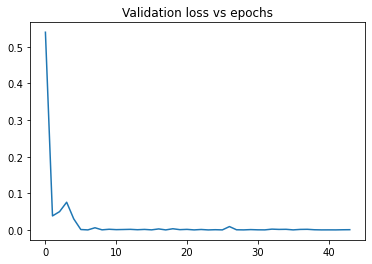

In [57]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

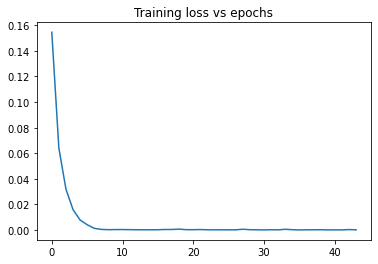

In [58]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [59]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [60]:
# forecast the number of Confirmed cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0030707], dtype=float32),
 array([1.0127947], dtype=float32),
 array([1.0225562], dtype=float32),
 array([1.03239], dtype=float32),
 array([1.0423195], dtype=float32),
 array([1.0523287], dtype=float32),
 array([1.0623643], dtype=float32),
 array([1.0724385], dtype=float32),
 array([1.0827482], dtype=float32),
 array([1.0932876], dtype=float32),
 array([1.1040462], dtype=float32),
 array([1.1155372], dtype=float32),
 array([1.1272906], dtype=float32),
 array([1.1393356], dtype=float32),
 array([1.1516914], dtype=float32),
 array([1.1643836], dtype=float32),
 array([1.1774433], dtype=float32)]

In [61]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([255900.39085615, 258381.15391088, 260871.46643293, 263380.23923099,
       265913.43311906, 268466.94243443, 271027.20328403, 273597.28731179,
       276227.46607661, 278916.24937499, 281660.96092308, 284592.49533033,
       287590.99765813, 290663.88851166, 293816.06427383, 297054.06359267,
       300385.79367042])

In [62]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [63]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([255900.39085615, 258381.15391088, 260871.46643293, 263380.23923099,
       265913.43311906, 268466.94243443, 271027.20328403, 273597.28731179,
       276227.46607661, 278916.24937499, 281660.96092308, 284592.49533033,
       287590.99765813, 290663.88851166, 293816.06427383, 297054.06359267,
       300385.79367042])

In [64]:
prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,Confirmed,Confirmed_predicted
2020-07-12,257303,255900.390856
2020-07-13,259652,258381.153911
2020-07-14,262173,260871.466433
2020-07-15,264561,263380.239231
2020-07-16,267061,265913.433119
2020-07-17,269440,268466.942434
2020-07-18,271606,271027.203284
2020-07-19,273788,273597.287312
2020-07-20,276202,276227.466077
2020-07-21,278827,278916.249375


<AxesSubplot:title={'center':'Iran Predictions for next 7 days-LSTM'}>

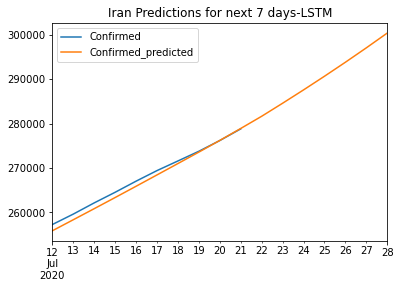

In [65]:
prediction_df.plot(title="Iran Predictions for next 7 days-LSTM")

In [66]:
MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100, " %")

MAPE is  0.30921423784530827  %


In [67]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99690785762155 %


### Multilayer Perceptron (MLP)

In [68]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [69]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

10
Samples: 162


In [70]:
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.89238271]
  [0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]]] => [[0.99060431]]
[[[0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]
  [0.99060431]]] => [[1.]]


In [71]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [72]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10, 200)           400       
                                                                 
 flatten_1 (Flatten)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [73]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [74]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 1s 35ms/step - loss: 0.1876 - val_loss: 0.0579
Epoch 2/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0098 - val_loss: 0.0385
Epoch 3/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0123 - val_loss: 0.0081
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 5.3647e-04 - val_loss: 0.0036
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 0.0085
Epoch 6/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 7.4013e-04
Epoch 7/200
10/10 [==============================] - 0s 14ms/step - loss: 4.2478e-04 - val_loss: 0.0018
Epoch 8/200
10/10 [==============================] - 0s 16ms/step - loss: 2.5987e-04 - val_loss: 4.2614e-04
Epoch 9/200
10/10 [==============================] - 0s 13ms/step - loss: 2.8548e-04 - val_loss: 4.1797e-06
Epoch 10/200
10/10 [==============================] - 0s 13ms/step - los

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

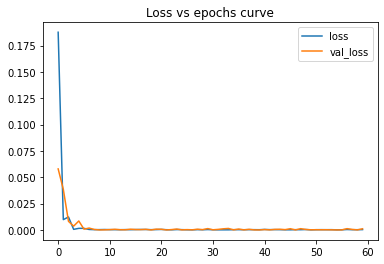

In [76]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [77]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

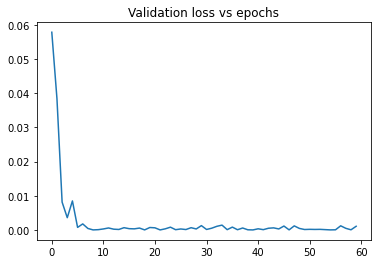

In [78]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

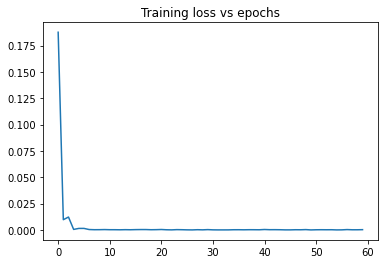

In [79]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [80]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [81]:
# forecast the number of Deaths cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0051615], dtype=float32),
 array([1.0147314], dtype=float32),
 array([1.0244862], dtype=float32),
 array([1.0341238], dtype=float32),
 array([1.0436584], dtype=float32),
 array([1.0529945], dtype=float32),
 array([1.0620475], dtype=float32),
 array([1.0711837], dtype=float32),
 array([1.0805823], dtype=float32),
 array([1.089724], dtype=float32),
 array([1.0990274], dtype=float32),
 array([1.1087464], dtype=float32),
 array([1.1184759], dtype=float32),
 array([1.1281939], dtype=float32),
 array([1.1378993], dtype=float32),
 array([1.1475925], dtype=float32),
 array([1.1573424], dtype=float32)]

In [82]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([256433.79247212, 258875.23240185, 261363.84183419, 263822.55595958,
       266254.99384367, 268636.79522109, 270946.36734724, 273277.16727018,
       275674.90470135, 278007.10359085, 280380.57199359, 282860.05773103,
       285342.21975231, 287821.43177891, 290297.45051229, 292770.36718941,
       295257.72971678])

<AxesSubplot:title={'center':'Iran Predictions for next 7 days-MLP'}>

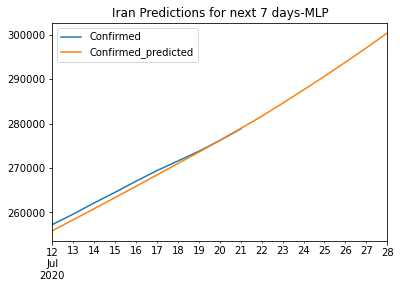

In [83]:
prediction_df.plot(title="Iran Predictions for next 7 days-MLP")

In [86]:
#MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                    #  np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
#print("MAPE is ",MAPE*100, " %")

In [87]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99690785762155 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [88]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [89]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_6 (Dense)             (None, 75)                11325     
                                                                 
 dense_7 (Dense)             (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [91]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [92]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [93]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 3s 64ms/step - loss: 0.1774 - val_loss: 0.4765
Epoch 2/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0368 - val_loss: 0.1123
Epoch 3/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0143 - val_loss: 0.0280
Epoch 4/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0040 - val_loss: 0.0057
Epoch 5/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0127
Epoch 6/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0013 - val_loss: 0.0098
Epoch 7/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 0.0085
Epoch 8/200
10/10 [==============================] - 0s 22ms/step - loss: 5.1117e-04 - val_loss: 0.0012
Epoch 9/200
10/10 [==============================] - 0s 19ms/step - loss: 6.6590e-04 - val_loss: 0.0113
Epoch 10/200
10/10 [==============================] - 0s 20ms/step - loss: 6.4062e-04 - val_

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

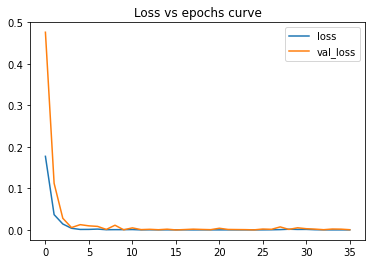

In [94]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [95]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

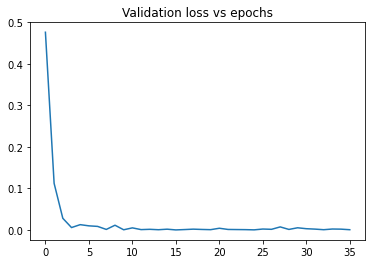

In [96]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

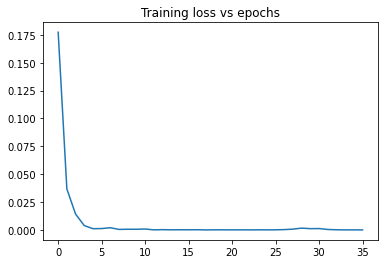

In [97]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [98]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [99]:
# forecast the number of Deaths cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0042468], dtype=float32),
 array([1.0136653], dtype=float32),
 array([1.0231333], dtype=float32),
 array([1.0326957], dtype=float32),
 array([1.0424129], dtype=float32),
 array([1.052268], dtype=float32),
 array([1.0623006], dtype=float32),
 array([1.0725349], dtype=float32),
 array([1.0830276], dtype=float32),
 array([1.0937847], dtype=float32),
 array([1.1048068], dtype=float32),
 array([1.1163417], dtype=float32),
 array([1.1282047], dtype=float32),
 array([1.1404213], dtype=float32),
 array([1.1530232], dtype=float32),
 array([1.1660398], dtype=float32),
 array([1.1794988], dtype=float32)]

In [100]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([256200.43876898, 258603.25505698, 261018.69245625, 263458.21641004,
       265937.24596274, 268451.46256542, 271010.93269479, 273621.8908757 ,
       276298.75254607, 279043.06873405, 281854.99150121, 284797.74805319,
       287824.19929969, 290940.85347641, 294155.83067179, 297476.58190334,
       300910.19324076])

In [101]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [104]:
#prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

#prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
#test_set=iran_df1.iloc[train_size:]['Deaths'].values.tolist()
#prediction_df.loc[:n_steps,"Deaths"] = iran_df1.iloc[train_size:]['Deaths'].values.tolist()
#prediction_df

<AxesSubplot:title={'center':'Iran Predictions for next 7 days-LSTM'}>

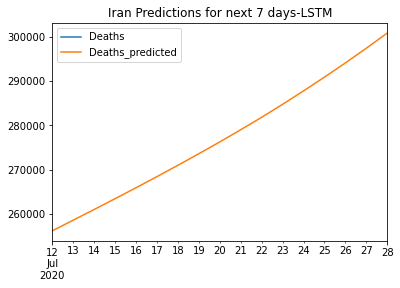

In [105]:
prediction_df.plot(title="Iran Predictions for next 7 days-LSTM")

In [106]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  nan  %


In [107]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  nan %


## Prediction of confirmed cases of the world using MLP and LSTM-RNN

In [108]:
c_world1=c_world[['Date','Confirmed']].copy().loc[:]
c_world1.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [109]:
len(c_world1)

182

In [110]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(c_world1)-n_steps

conf=c_world1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [111]:
normal_test

array([[1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

### Multilayer Perceptron (MLP)

In [112]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [113]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

10
Samples: 162


In [114]:
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.82138247]
  [0.83849445]
  [0.85482162]
  [0.87081778]
  [0.88603359]
  [0.90039479]
  [0.9135492 ]
  [0.93012312]
  [0.94677235]
  [0.9647127 ]]] => [[0.982995]]
[[[0.83849445]
  [0.85482162]
  [0.87081778]
  [0.88603359]
  [0.90039479]
  [0.9135492 ]
  [0.93012312]
  [0.94677235]
  [0.9647127 ]
  [0.982995  ]]] => [[1.]]


In [115]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [116]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10, 200)           400       
                                                                 
 flatten_2 (Flatten)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [117]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

In [118]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 1s 43ms/step - loss: 0.1335 - val_loss: 0.4389
Epoch 2/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0269 - val_loss: 0.0245
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0144 - val_loss: 0.0104
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0080 - val_loss: 3.7170e-04
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0134
Epoch 6/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 7/200
10/10 [==============================] - 0s 13ms/step - loss: 2.7760e-04 - val_loss: 0.0028
Epoch 8/200
10/10 [==============================] - 0s 13ms/step - loss: 4.7930e-04 - val_loss: 0.0030
Epoch 9/200
10/10 [==============================] - 0s 14ms/step - loss: 3.5626e-04 - val_loss: 1.9368e-04
Epoch 10/200
10/10 [==============================] - 0s 16ms/step - loss: 2.158

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

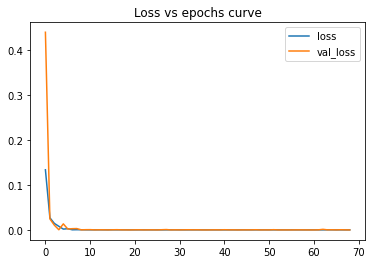

In [120]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [121]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

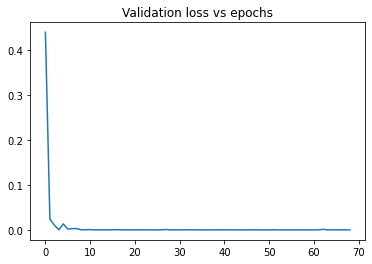

In [122]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

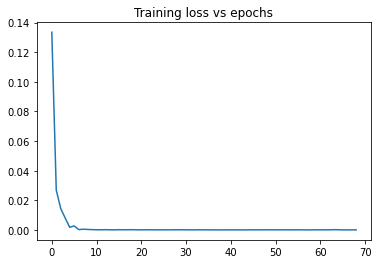

In [123]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [124]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [125]:
# forecast the number of confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0107327], dtype=float32),
 array([1.0275662], dtype=float32),
 array([1.0447098], dtype=float32),
 array([1.0618169], dtype=float32),
 array([1.079139], dtype=float32),
 array([1.097137], dtype=float32),
 array([1.1153868], dtype=float32),
 array([1.1334945], dtype=float32),
 array([1.1515311], dtype=float32),
 array([1.1698815], dtype=float32),
 array([1.1883478], dtype=float32),
 array([1.2075497], dtype=float32),
 array([1.2270168], dtype=float32),
 array([1.2467458], dtype=float32),
 array([1.2667587], dtype=float32),
 array([1.2870526], dtype=float32),
 array([1.3075931], dtype=float32)]

In [126]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12858522.69751549, 13072669.49683309, 13290760.74643767,
       13508387.94306731, 13728749.41261792, 13957709.51082182,
       14189874.00097358, 14420229.29112828, 14649680.73954094,
       14883123.65014327, 15118042.12788487, 15362317.49077475,
       15609967.09506738, 15860948.47839904, 16115540.67915988,
       16373708.81755114, 16635013.10480571])

In [127]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = c_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [128]:
prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=c_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = c_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,Confirmed,Confirmed_predicted
2020-07-12,12914656,1.285852e+07
2020-07-13,13107435,1.307267e+07
2020-07-14,13328887,1.329076e+07
2020-07-15,13560006,1.350839e+07
2020-07-16,13812547,1.372875e+07
2020-07-17,14054586,1.395771e+07
2020-07-18,14292221,1.418987e+07
2020-07-19,14506868,1.442023e+07
2020-07-20,14713646,1.464968e+07
2020-07-21,14947101,1.488312e+07


<AxesSubplot:title={'center':'World Predictions for next 7 days-MLP'}>

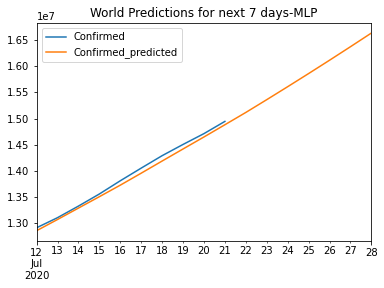

In [129]:
prediction_df.plot(title="World Predictions for next 7 days-MLP")

In [130]:
MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.48386416901606166  %


In [131]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99516135830984 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [132]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [133]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_10 (Dense)            (None, 75)                11325     
                                                                 
 dense_11 (Dense)            (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [134]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

In [135]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [136]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 4s 133ms/step - loss: 0.1005 - val_loss: 0.7768
Epoch 2/200
10/10 [==============================] - 0s 26ms/step - loss: 0.0528 - val_loss: 0.3575
Epoch 3/200
10/10 [==============================] - 0s 28ms/step - loss: 0.0259 - val_loss: 0.0785
Epoch 4/200
10/10 [==============================] - 0s 28ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 5/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 2.8029e-06
Epoch 6/200
10/10 [==============================] - 0s 30ms/step - loss: 3.3353e-04 - val_loss: 0.0323
Epoch 7/200
10/10 [==============================] - 0s 36ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 8/200
10/10 [==============================] - 0s 32ms/step - loss: 1.3124e-04 - val_loss: 0.0023
Epoch 9/200
10/10 [==============================] - 0s 47ms/step - loss: 1.5811e-04 - val_loss: 0.0063
Epoch 10/200
10/10 [==============================] - 0s 31ms/step - loss: 6.3413e-

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

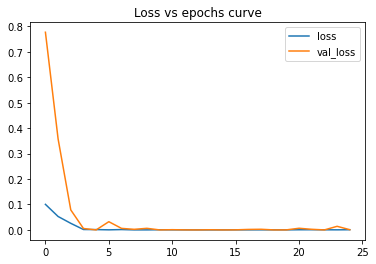

In [137]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [138]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

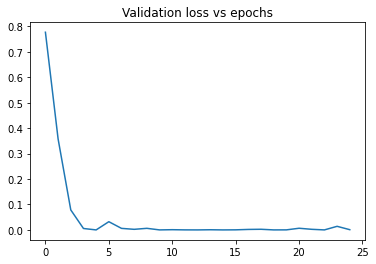

In [139]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

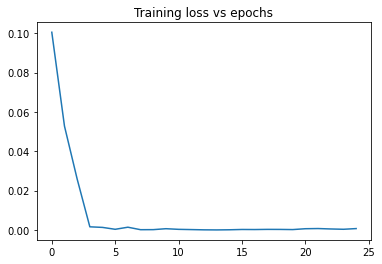

In [140]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [141]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [142]:
# forecast the number of Confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0140841], dtype=float32),
 array([1.0306631], dtype=float32),
 array([1.0474226], dtype=float32),
 array([1.0644633], dtype=float32),
 array([1.0818692], dtype=float32),
 array([1.0997664], dtype=float32),
 array([1.1179285], dtype=float32),
 array([1.1363875], dtype=float32),
 array([1.155068], dtype=float32),
 array([1.1739793], dtype=float32),
 array([1.1932653], dtype=float32),
 array([1.2132018], dtype=float32),
 array([1.2336617], dtype=float32),
 array([1.2546939], dtype=float32),
 array([1.2763385], dtype=float32),
 array([1.2986389], dtype=float32),
 array([1.3216345], dtype=float32)]

In [143]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12901157.94371629, 13112066.98780024, 13325272.03255105,
       13542053.01493228, 13763482.10962784, 13991159.2378422 ,
       14222207.57443333, 14457032.02836955, 14694675.67995417,
       14935253.78417444, 15180599.80523527, 15434219.92116952,
       15694499.04564285, 15962058.94898117, 16237409.1795491 ,
       16521103.264588  , 16813640.13687158])

In [144]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = c_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [145]:
prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=c_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = c_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,Confirmed,Confirmed_predicted
2020-07-12,12914656,1.290116e+07
2020-07-13,13107435,1.311207e+07
2020-07-14,13328887,1.332527e+07
2020-07-15,13560006,1.354205e+07
2020-07-16,13812547,1.376348e+07
2020-07-17,14054586,1.399116e+07
2020-07-18,14292221,1.422221e+07
2020-07-19,14506868,1.445703e+07
2020-07-20,14713646,1.469468e+07
2020-07-21,14947101,1.493525e+07


<AxesSubplot:title={'center':'World Predictions for next 7 days-LSTM'}>

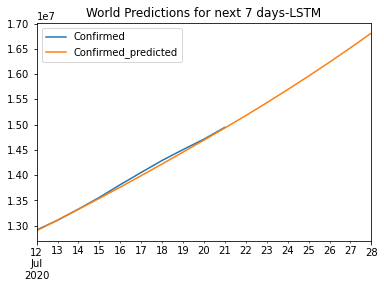

In [146]:
prediction_df.plot(title="World Predictions for next 7 days-LSTM")

In [147]:
MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.21474778775077888  %


In [148]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99785252212249 %


## Prediction of deaths of the world using MLP and LSTM-RNN

In [149]:
c_world1=c_world[['Date','Deaths']].copy().loc[:]
c_world1.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [152]:
len(c_world1)

182

In [153]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(c_world1)-n_steps

conf=c_world1['Deaths'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Deaths'].values.reshape(-1,1)
test = conf[train_size:]#['Deaths'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [154]:
normal_test

array([[1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

### Multilayer Perceptron (MLP)

In [155]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

10
Samples: 162


In [156]:
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.90473131]
  [0.91359998]
  [0.92266156]
  [0.9315019 ]
  [0.93923433]
  [0.94533143]
  [0.95205151]
  [0.96285992]
  [0.9722737 ]
  [0.98193348]]] => [[0.9913331]]
[[[0.91359998]
  [0.92266156]
  [0.9315019 ]
  [0.93923433]
  [0.94533143]
  [0.95205151]
  [0.96285992]
  [0.9722737 ]
  [0.98193348]
  [0.9913331 ]]] => [[1.]]


In [157]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [158]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10, 200)           400       
                                                                 
 flatten_3 (Flatten)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 2001      
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [159]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

In [160]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [161]:
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 1s 34ms/step - loss: 0.0663 - val_loss: 0.0035
Epoch 2/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 3/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 0.0171
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 0.0100
Epoch 5/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 5.2417e-05
Epoch 6/200
10/10 [==============================] - 0s 16ms/step - loss: 5.4437e-04 - val_loss: 1.1914e-04
Epoch 7/200
10/10 [==============================] - 0s 15ms/step - loss: 7.1476e-04 - val_loss: 1.2610e-08
Epoch 8/200
10/10 [==============================] - 0s 13ms/step - loss: 3.5465e-04 - val_loss: 2.0673e-04
Epoch 9/200
10/10 [==============================] - 0s 15ms/step - loss: 3.9280e-04 - val_loss: 6.1304e-07
Epoch 10/200
10/10 [==============================] - 0s 20ms/st

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

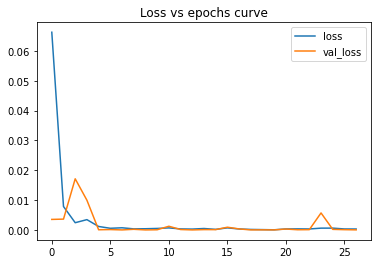

In [162]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [163]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

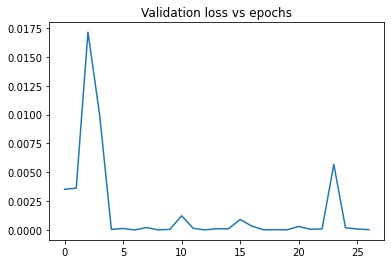

In [164]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

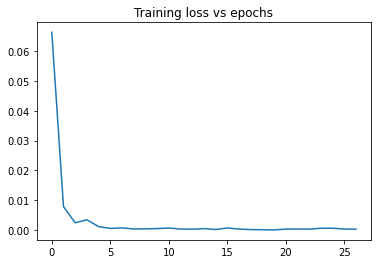

In [165]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [166]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [167]:
# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0090078], dtype=float32),
 array([1.017781], dtype=float32),
 array([1.0267566], dtype=float32),
 array([1.0359536], dtype=float32),
 array([1.0455188], dtype=float32),
 array([1.05509], dtype=float32),
 array([1.0645833], dtype=float32),
 array([1.074033], dtype=float32),
 array([1.0834578], dtype=float32),
 array([1.0929446], dtype=float32),
 array([1.1025233], dtype=float32),
 array([1.1122012], dtype=float32),
 array([1.1219661], dtype=float32),
 array([1.1317989], dtype=float32),
 array([1.141668], dtype=float32),
 array([1.1515592], dtype=float32),
 array([1.161488], dtype=float32)]

In [168]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([570129.62070334, 575086.68481755, 580158.11940348, 585354.6340636 ,
       590759.14402211, 596167.08913612, 601531.0507884 , 606870.36014819,
       612195.59210598, 617555.84917879, 622968.0377202 , 628436.26644564,
       633953.66504407, 639509.38920105, 645085.6569351 , 650674.45288336,
       656284.46596861])

In [169]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = c_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [170]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=c_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = c_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,568994,570129.620703
2020-07-13,572809,575086.684818
2020-07-14,578469,580158.119403
2020-07-15,583962,585354.634064
2020-07-16,589761,590759.144022
2020-07-17,596504,596167.089136
2020-07-18,602131,601531.050788
2020-07-19,606160,606870.360148
2020-07-20,610208,612195.592106
2020-07-21,616432,617555.849179


<AxesSubplot:title={'center':'World Predictions for next 7 days-MLP'}>

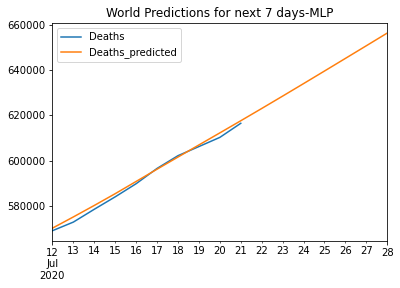

In [171]:
prediction_df.plot(title="World Predictions for next 7 days-MLP")

In [172]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.20782898958032928  %


In [173]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.9979217101042 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [174]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [175]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               91200     
                                                                 
 dense_14 (Dense)            (None, 75)                11325     
                                                                 
 dense_15 (Dense)            (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [176]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

In [177]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [178]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 3s 62ms/step - loss: 0.1322 - val_loss: 0.8430
Epoch 2/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0137 - val_loss: 0.5755
Epoch 3/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0696 - val_loss: 0.1874
Epoch 4/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0169 - val_loss: 0.0391
Epoch 5/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0066 - val_loss: 0.0237
Epoch 6/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0030 - val_loss: 0.0696
Epoch 7/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0032 - val_loss: 1.6403e-04
Epoch 8/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 9/200
10/10 [==============================] - 0s 22ms/step - loss: 4.6821e-04 - val_loss: 0.0024
Epoch 10/200
10/10 [==============================] - 0s 21ms/step - loss: 1.4380e-04 - val_

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

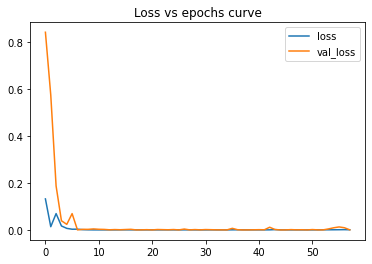

In [179]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [180]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

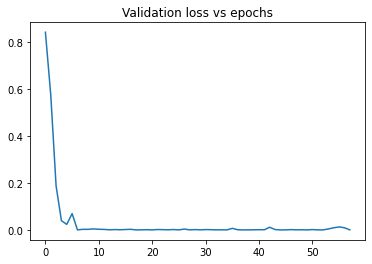

In [181]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

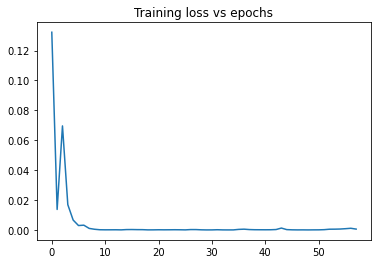

In [182]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [183]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [184]:
# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0008131], dtype=float32),
 array([1.0095422], dtype=float32),
 array([1.0182666], dtype=float32),
 array([1.027118], dtype=float32),
 array([1.0362716], dtype=float32),
 array([1.0457067], dtype=float32),
 array([1.0550294], dtype=float32),
 array([1.064404], dtype=float32),
 array([1.0738237], dtype=float32),
 array([1.0833248], dtype=float32),
 array([1.0930277], dtype=float32),
 array([1.1037066], dtype=float32),
 array([1.1146564], dtype=float32),
 array([1.125916], dtype=float32),
 array([1.1375124], dtype=float32),
 array([1.1494584], dtype=float32),
 array([1.1617709], dtype=float32)]

In [185]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([565499.43521059, 570431.57760835, 575361.02576649, 580362.27541041,
       585534.27249002, 590865.36441898, 596132.872293  , 601429.74737883,
       606752.08302903, 612120.42282069, 617602.79630411, 623636.61328101,
       629823.53042412, 636185.43843031, 642737.6944654 , 649487.43826437,
       656444.30173385])

In [188]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = c_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [189]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=c_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = c_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,568994,565499.435211
2020-07-13,572809,570431.577608
2020-07-14,578469,575361.025766
2020-07-15,583962,580362.275410
2020-07-16,589761,585534.272490
2020-07-17,596504,590865.364419
2020-07-18,602131,596132.872293
2020-07-19,606160,601429.747379
2020-07-20,610208,606752.083029
2020-07-21,616432,612120.422821


<AxesSubplot:title={'center':'World Predictions for next 7 days-LSTM'}>

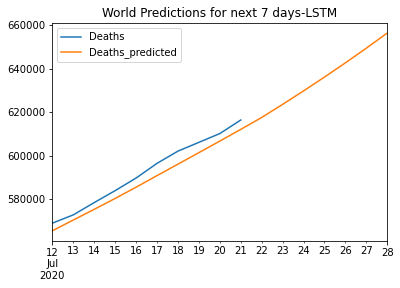

In [190]:
prediction_df.plot(title="World Predictions for next 7 days-LSTM")

In [191]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.6887189313568226  %


In [192]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99311281068643 %


# Data modeling and prediction based on dataframes (multivariate time series)

## Predicting the total number of confirmed cases of the world

In [193]:
data = c_world.copy().drop(['Date'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Confirmed                182 non-null    int64  
 1   Deaths                   182 non-null    int64  
 2   Recovered                182 non-null    int64  
 3   Active                   182 non-null    int64  
 4   New confirmed            182 non-null    int64  
 5   New deaths               182 non-null    int64  
 6   New recovered            182 non-null    int64  
 7   Recovery rate(per 100)   182 non-null    float64
 8   Mortality rate(per 100)  182 non-null    float64
 9   Number of countries      182 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 14.3 KB


In [194]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
count,1.820000e+02,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.00000,182.000000,182.000000
mean,4.024314e+06,217257.785714,1.822222e+06,1.984834e+06,82239.362637,3386.895604,45593.813187,33.34033,4.892637,142.895604
std,4.341807e+06,208112.153272,2.322991e+06,1.864916e+06,69859.536984,2504.148916,50677.967418,15.89596,1.600865,65.845165
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,1.71000,2.040000,6.000000
25%,1.062908e+05,3614.000000,5.720925e+04,5.772325e+04,4817.750000,216.250000,2430.000000,21.94500,3.450000,95.250000
50%,2.591061e+06,184500.500000,6.696375e+05,1.736923e+06,80182.000000,3976.000000,28652.000000,34.44500,4.945000,184.000000
75%,6.850280e+06,399905.750000,2.994759e+06,3.455616e+06,123650.500000,5311.000000,75868.250000,47.71000,6.375000,187.000000
max,1.494710e+07,616432.000000,8.298102e+06,6.032567e+06,252544.000000,8890.000000,283061.000000,55.52000,7.190000,187.000000


<AxesSubplot:>

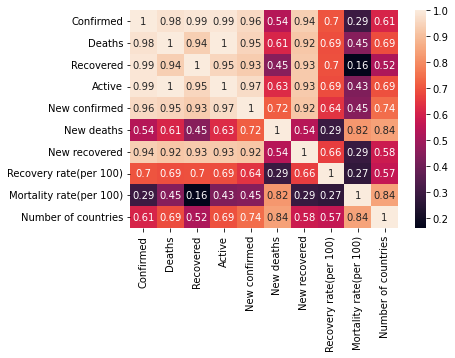

In [195]:
# Correlations

sns.heatmap(data.corr(), annot = True)

In [196]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [197]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y,test_size = 0.2,random_state=42)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(145, 9)
(145,)
(37, 9)
(37,)


### Decision tree regressor

RMSE of  DecisionTreeRegressor 123831.02
MAE of  DecisionTreeRegressor 90908.97 



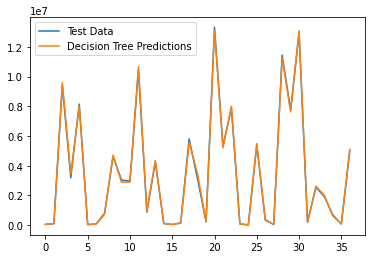

In [198]:
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)

tree_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = tree_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Decision Tree Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", tree_reg.__class__.__name__, round(rmse,2))
print("MAE of ", tree_reg.__class__.__name__, round(mae,2), '\n')

### Support vector machine regressor

RMSE of  SVR 3244493.15
MAE of  SVR 2741741.32 



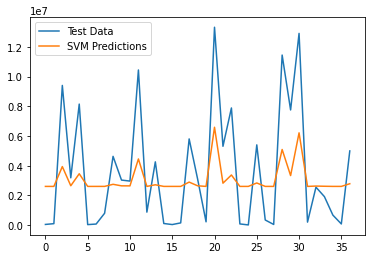

In [199]:
svm_reg = SVR(C=1000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 1372208.15
MAE of  SVR 1295282.53 



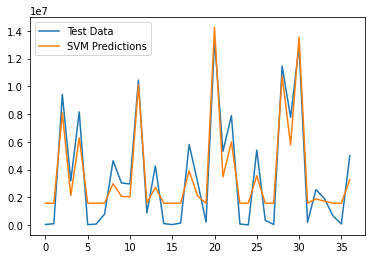

In [200]:
svm_reg = SVR(C=100000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 800855.89
MAE of  SVR 670385.71 



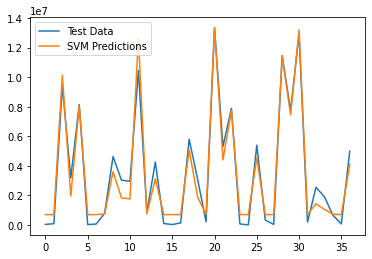

In [201]:
svm_reg = SVR(C=1000000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

### Random Forests Regressor

RMSE of  RandomForestRegressor 57837.65
MAE of  RandomForestRegressor 37599.3 



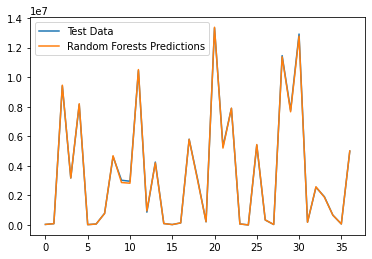

In [202]:
rf_reg = RandomForestRegressor(max_depth=9,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

### XGBoost Regressor

In [203]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSE of  XGBRegressor 106236.73
MAE of  XGBRegressor 79767.7 



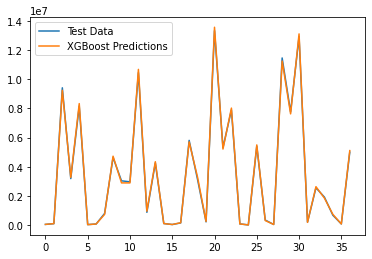

In [204]:
xgb_reg= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

## Add some new columns to data

In [206]:
data['Day'] = c_world['Date'].dt.day
data['Month'] = c_world['Date'].dt.month
data['Day of week'] = c_world['Date'].dt.dayofweek
data['Day of year'] = c_world['Date'].dt.dayofyear
data['Quarter'] = c_world['Date'].dt.quarter
data['Week of year'] = c_world['Date'].dt.weekofyear

In [207]:
data.head()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries,Day,Month,Day of week,Day of year,Quarter,Week of year
0,555,17,28,510,0,0,0,5.05,3.06,6,22,1,2,22,1,4
1,654,18,30,606,99,1,2,4.59,2.75,8,23,1,3,23,1,4
2,941,26,36,879,287,8,6,3.83,2.76,9,24,1,4,24,1,4
3,1434,42,39,1353,493,16,3,2.72,2.93,11,25,1,5,25,1,4
4,2118,56,52,2010,684,14,13,2.46,2.64,13,26,1,6,26,1,4


<AxesSubplot:>

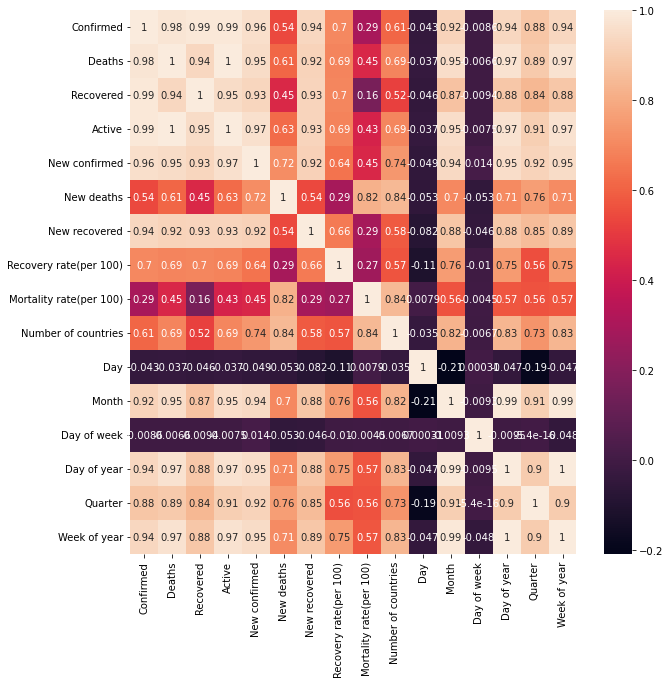

In [208]:
# Correlations
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot = True)

In [209]:
# drop some columns based on correlations

data=data.drop(['Day','Day of week'],axis=1)
data.head()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries,Month,Day of year,Quarter,Week of year
0,555,17,28,510,0,0,0,5.05,3.06,6,1,22,1,4
1,654,18,30,606,99,1,2,4.59,2.75,8,1,23,1,4
2,941,26,36,879,287,8,6,3.83,2.76,9,1,24,1,4
3,1434,42,39,1353,493,16,3,2.72,2.93,11,1,25,1,4
4,2118,56,52,2010,684,14,13,2.46,2.64,13,1,26,1,4


In [210]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [211]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y,test_size = 0.2,random_state=42)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(145, 13)
(145,)
(37, 13)
(37,)


### Decision tree regressor

RMSE of  DecisionTreeRegressor 125949.49
MAE of  DecisionTreeRegressor 99727.19 



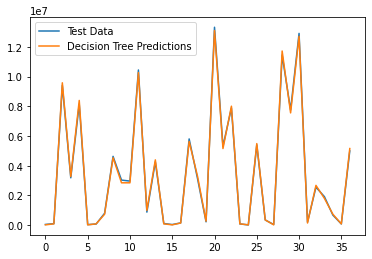

In [212]:
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)

tree_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = tree_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Decision Tree Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", tree_reg.__class__.__name__, round(rmse,2))
print("MAE of ", tree_reg.__class__.__name__, round(mae,2), '\n')

### Support vector machine regressor

RMSE of  SVR 3340428.6
MAE of  SVR 2794821.61 



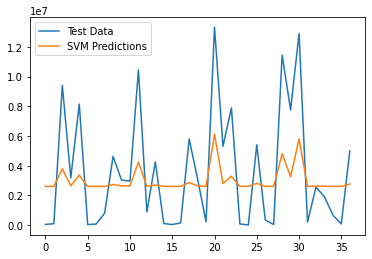

In [213]:
svm_reg = SVR(C=1000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 814859.95
MAE of  SVR 710927.02 



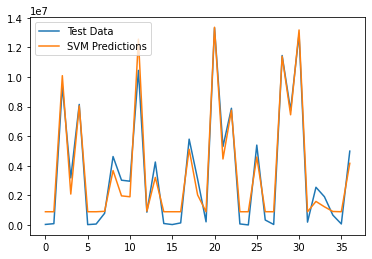

In [214]:
svm_reg = SVR(C=1000000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

### Random Forests Regressor

RMSE of  RandomForestRegressor 57629.88
MAE of  RandomForestRegressor 34014.48 



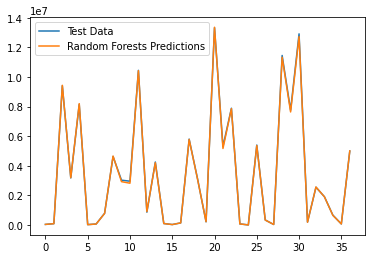

In [215]:
rf_reg = RandomForestRegressor(max_depth=8,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

### XGBoost Regressor

In [216]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSE of  XGBRegressor 106236.73
MAE of  XGBRegressor 79767.7 



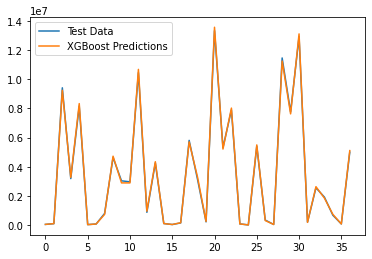

In [217]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')